In [1]:
!pip install google-generativeai
!pip install openai

In [2]:
!pip install python-dotenv
!pip install transformers

In [14]:
import os
from openai import OpenAI
from dotenv import load_dotenv

In [15]:
load_dotenv()
print("Available env vars:", list(os.environ.keys()))

Available env vars: ['CHROME_DESKTOP', 'CLUTTER_DISABLE_MIPMAPPED_TEXT', 'DBUS_SESSION_BUS_ADDRESS', 'DEBUGINFOD_URLS', 'DESKTOP_SESSION', 'DISPLAY', 'GDK_BACKEND', 'GDMSESSION', 'GIO_LAUNCHED_DESKTOP_FILE', 'GIO_LAUNCHED_DESKTOP_FILE_PID', 'GJS_DEBUG_OUTPUT', 'GJS_DEBUG_TOPICS', 'GNOME_DESKTOP_SESSION_ID', 'GNOME_SETUP_DISPLAY', 'GNOME_SHELL_SESSION_MODE', 'GSM_SKIP_SSH_AGENT_WORKAROUND', 'GTK_MODULES', 'HOME', 'IM_CONFIG_CHECK_ENV', 'IM_CONFIG_PHASE', 'INVOCATION_ID', 'JOURNAL_STREAM', 'LANG', 'LANGUAGE', 'LESSCLOSE', 'LESSOPEN', 'LOGNAME', 'MANAGERPID', 'MEMORY_PRESSURE_WATCH', 'MEMORY_PRESSURE_WRITE', 'NVM_BIN', 'NVM_DIR', 'NVM_INC', 'ORIGINAL_XDG_CURRENT_DESKTOP', 'PATH', 'PWD', 'QT_ACCESSIBILITY', 'QT_IM_MODULE', 'SESSION_MANAGER', 'SHELL', 'SHLVL', 'SSH_AUTH_SOCK', 'SYSTEMD_EXEC_PID', 'USER', 'USERNAME', 'VSCODE_CODE_CACHE_PATH', 'VSCODE_CRASH_REPORTER_PROCESS_TYPE', 'VSCODE_CWD', 'VSCODE_ESM_ENTRYPOINT', 'VSCODE_HANDLES_UNCAUGHT_ERRORS', 'VSCODE_IPC_HOOK', 'VSCODE_NLS_CONFIG', 

In [16]:
import os
print("Current directory:", os.getcwd())
print("Files here:", [f for f in os.listdir('.') if f.startswith('.')])

Current directory: /home/amantya/Desktop/task1/dl-rag-bot
Files here: ['.env']


In [17]:
from dotenv import load_dotenv
result = load_dotenv('./.env') 
print("Loaded:", result)

Loaded: True


In [18]:
load_dotenv()

api_key = os.getenv("OPENROUTER_API_KEY")
if api_key is None:
    raise ValueError("OPENROUTER_API_KEY environment variable not set. Please check your .env file.")

client = OpenAI(
    api_key=api_key,
    base_url="https://openrouter.ai/api/v1"
)

In [8]:
%pip install -U langchain langchain-community langchain-openai \
  faiss-cpu pypdf sentence-transformers tiktoken python-dotenv requests

Note: you may need to restart the kernel to use updated packages.


In [19]:
models = client.models.list()
print([m.id for m in models.data])

['nvidia/nemotron-nano-9b-v2', 'openrouter/sonoma-dusk-alpha', 'openrouter/sonoma-sky-alpha', 'qwen/qwen3-max', 'moonshotai/kimi-k2-0905', 'bytedance/seed-oss-36b-instruct', 'deepcogito/cogito-v2-preview-llama-109b-moe', 'deepcogito/cogito-v2-preview-deepseek-671b', 'stepfun-ai/step3', 'qwen/qwen3-30b-a3b-thinking-2507', 'x-ai/grok-code-fast-1', 'nousresearch/hermes-4-70b', 'nousresearch/hermes-4-405b', 'google/gemini-2.5-flash-image-preview', 'deepseek/deepseek-chat-v3.1:free', 'deepseek/deepseek-chat-v3.1', 'deepseek/deepseek-v3.1-base', 'openai/gpt-4o-audio-preview', 'mistralai/mistral-medium-3.1', 'baidu/ernie-4.5-21b-a3b', 'baidu/ernie-4.5-vl-28b-a3b', 'z-ai/glm-4.5v', 'ai21/jamba-mini-1.7', 'ai21/jamba-large-1.7', 'openai/gpt-5-chat', 'openai/gpt-5', 'openai/gpt-5-mini', 'openai/gpt-5-nano', 'openai/gpt-oss-120b:free', 'openai/gpt-oss-120b', 'openai/gpt-oss-20b:free', 'openai/gpt-oss-20b', 'anthropic/claude-opus-4.1', 'mistralai/codestral-2508', 'qwen/qwen3-coder-30b-a3b-instruct

In [20]:
response = client.chat.completions.create(
    model = "qwen/qwen3-4b:free",
    messages = [{"role":"user","content" : "Hello, how can you assist me today?"}]
)

print(response.choices[0].message.content)

Hello! I’m Venice Small, an AI assistant designed to help with a wide range of tasks. Here’s how I can assist you today:  

1. **Answer questions**: I can provide information on topics ranging from general knowledge to niche subjects, based on my training data.  
2. **Problem-solving**: Help with math calculations, logic puzzles, or step-by-step explanations for complex problems.  
3. **Content creation**: Write essays, stories, emails, or other texts tailored to your needs.  
4. **Opinions and debates**: Offer perspectives on topics, challenge assumptions, or engage in discussions (though I avoid political correctness or censorship).  
5. **Calculations**: Perform mathematical computations, including integrals, derivatives, or algebraic manipulations.  
6. **Language tasks**: Translate text, summarize passages, or analyze grammar.  

What would you like help with specifically? I’m here to streamline your workflow, solve problems, or spark creativity. Just share your request, and I’ll 

import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.utils.utils import secret_from_env
from pydantic import Field, SecretStr

load_dotenv()

class ChatOpenRouter(ChatOpenAI):
    openai_api_key: SecretStr = Field(
        alias="api_key",
        default_factory=secret_from_env("OPENROUTER_API_KEY", default=None),
    )
    @property
    def lc_secrets(self) -> dict[str, str]:
        return {"openai_api_key": "OPENROUTER_API_KEY"}

    def __init__(self, model_name: str = "qwen/qwen3-4b:free", **kwargs):
        openai_api_key = os.environ.get("OPENROUTER_API_KEY")
        super().__init__(
            model_name=model_name,
            openai_api_key=openai_api_key,
            openai_api_base="https://openrouter.ai/api/v1",
            **kwargs
        )



from langchain_community.document_loaders import TextLoader
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

loader = TextLoader('/home/amantya/Desktop/task1/newFile.txt', encoding="utf-8")
docs = loader.load()


model = ChatOpenRouter(model_name="qwen/qwen3-4b:free", temperature=0.2)

prompt = PromptTemplate(
    template="Summarize the following text:\n\n{text}",
    input_variables=["text"],
)
parser = StrOutputParser()

chain = prompt | model | parser  

result = chain.invoke({"text": docs[0].page_content})

print("Content:", docs[0].page_content)
print("Summary:", result)


In [21]:
response = client.chat.completions.create(
    model="qwen/qwen3-4b:free",
    messages=[
        {"role": "system", "content": "you have knowledge about deep learning"},
        {"role": "user", "content": "Explain the mechanism of Dropout as described in the book 'The Little Book of Deep Learning' specifically detailing its two different roles during the training phase versus the inference(or test) phase.provide a concrete,numerical,example of how the scaling is applied to the metwork weights during inference."}
    ]
)
print(response.choices[0].message.content)


The **Dropout** mechanism, as described in *The Little Book of Deep Learning*, has two distinct roles during **training** and **inference** (test) phases. Here’s a detailed breakdown with a numerical example:

---

### **1. Role During Training Phase**
- **Mechanism**: During training, neurons (or their outputs) are **randomly "turned off"** with a probability `p` (the dropout rate). For example, if `p = 0.5`, half of the neurons in a layer are deactivated, and their weights are **not updated** during backpropagation.
- **Purpose**: This forces the network to learn **more robust features** by preventing over-reliance on any single neuron. The network must learn to distribute the credit across all neurons.
- **Example**: Suppose a layer has weights `[w1, w2, w3] = [2.0, 3.0, 4.0]`. During training, if `p = 0.5` and `w1` is dropped out, its contribution is zero. The remaining weights (`w2` and `w3`) are used, but their values remain unchanged.

---

### **2. Role During Inference Phase**

from langchain_community.document_loaders import WebBaseLoader
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def scrape_with_langchain(url):
    try:
        loader = WebBaseLoader(url)
        # Configure to ignore SSL
        loader.session.verify = False
        
        docs = loader.load()
        return docs[0].page_content if docs else None
    
    except Exception as e:
        print(f"Error: {e}")
        return None

content = scrape_with_langchain("https://sih.gov.in")
if content:
    print(content)

In [22]:
!pip install pymupdf

In [23]:
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter

text = """Deep
Deep learn
learning
learning
ing 
belongs historically to the larger field of statistical machine
learning
learning
learning
ing,
ing as it fundamentally concerns methods that are able to learn representations from data. The techniques involved come originally from ar
arti
arti
tifi
tifi
ficial
ficial
cial neu
neural
ral
ral net
net-
net
works
works,
works and the “deep” qualifier highlights that models are long compositions of mappings, now known to achieve greater performance."""

docs = [Document(page_content=text)]
print(docs[0].page_content)

splitter = RecursiveCharacterTextSplitter(
    chunk_size=10,
    chunk_overlap=2,
    # separators=['.']
)
texts = splitter.split_documents(docs)
print(len(texts))
for i, t in enumerate(texts):
    print(f"---\nChunk {i}: {t.page_content}\n---")

Deep
Deep learn
learning
learning
ing 
belongs historically to the larger field of statistical machine
learning
learning
learning
ing,
ing as it fundamentally concerns methods that are able to learn representations from data. The techniques involved come originally from ar
arti
arti
tifi
tifi
ficial
ficial
cial neu
neural
ral
ral net
net-
net
works
works,
works and the “deep” qualifier highlights that models are long compositions of mappings, now known to achieve greater performance.
68
---
Chunk 0: Deep
---
---
Chunk 1: Deep
---
---
Chunk 2: learn
---
---
Chunk 3: learning
---
---
Chunk 4: learning
---
---
Chunk 5: ing
---
---
Chunk 6: belongs
---
---
Chunk 7: historica
---
---
Chunk 8: cally
---
---
Chunk 9: to the
---
---
Chunk 10: larger
---
---
Chunk 11: field of
---
---
Chunk 12: statistic
---
---
Chunk 13: ical
---
---
Chunk 14: machine
---
---
Chunk 15: learning
---
---
Chunk 16: learning
---
---
Chunk 17: learning
---
---
Chunk 18: ing,
---
---
Chunk 19: ing as it
---
---
Chun

In [27]:
import re
import fitz  # PyMuPDF
import os
from langchain_community.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

def improved_clean(text):
    # Collapse repeated words/fragments
    text = re.sub(r'(\b\w+\b)(?:\s*\1\b)+', r'\1', text)
    # Insert space before capital letters (except at start)
    text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', text)
    # Remove excessive whitespace
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

path = '/home/amantya/Desktop/task1/dl-rag-bot/data/lbdl.pdf'

def load_and_split(path, chunk_size=500, chunk_overlap=50):
    loader = PyMuPDFLoader(path)
    docs = loader.load()
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        separators=["\n\n", "\n", ".", " ", ""]
    )
    chunks = splitter.split_documents(docs)
    for chunk in chunks:
        chunk.page_content = improved_clean(chunk.page_content)
    return chunks

chunks = load_and_split(path)

def extract_images(pdf_path, output_dir):
    """
    Extracts images from a PDF file and saves them to the output directory.
    """
    os.makedirs(output_dir, exist_ok=True)
    pdf = fitz.open(pdf_path)
    for page_index, page in enumerate(pdf):
        for img_index, img in enumerate(page.get_images(full=True)):
            xref = img[0]
            base_image = pdf.extract_image(xref)
            image_bytes = base_image["image"]
            image_ext = base_image["ext"]
            image_filename = f"page{page_index+1}_img{img_index+1}.{image_ext}"
            image_path = os.path.join(output_dir, image_filename)
            with open(image_path, "wb") as f:
                f.write(image_bytes)
    pdf.close()
    print(f"Extracted images to '{output_dir}'")

# --- Main execution ---

print(f"Total chunks: {len(chunks)}\n")
for idx, doc in enumerate(chunks[:50]):
    print(f"--- Document Chunk {idx+1} ---")
    print(doc.page_content)
    print(f"Chunk length: {len(doc.page_content)}\n")

image_output_dir = os.path.join(os.path.dirname(path), "extracted_images")
extract_images(path, image_output_dir)

Total chunks: 520

--- Document Chunk 1 ---
The Little Book of Deep Learning François Fleuret
Chunk length: 49

--- Document Chunk 2 ---
François Fleuret is a professor of computer sci- ence at the University of Geneva, Switzerland. The cover illustration is a schematic of the Neocognitron by Fukushima [1980], a key an- cestor of deep neural networks. This ebook is formatted to fit on a phone screen.
Chunk length: 266

--- Document Chunk 3 ---
Contents 5 List of figures 7 Foreword 8 I Foundations 10 1 Machine Learning 11 1.1 Learning from data . . . . . . . 12 1.2 Basis function regression . . . . 14 1.3 Under and overfitting . . . . . . 16 1.4 Categories of models . . . . . . 18 2 Efficient Computation 20 2.1 GPUs, TPUs, and batches . . . . 21 2.2 Tensors . . . . . . . . . . . . . . 23 3 Training 25 3.1 Losses . . . . . . . . . . . . . . 26 3.2 Autoregressive models . . . . . 30 3.3 Gradient descent . . . . . . . . 35 3
Chunk length: 486

--- Document Chunk 4 ---
3.4 Backpropagation .

In [28]:
!pip install keras-nlp
!pip install tensorflow
!pip install sentencepiece
!pip install transformers
!pip install accelerate

  Using cached tensorflow-2.19.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow-2.19.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (645.0 MB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.20.0
    Uninstalling tensorboard-2.20.0:
      Successfully uninstalled tensorboard-2.20.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.20.0
    Uninstalling tensorflow-2.20.0:
      Successfully uninstalled tensorflow-2.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.20.1 requires tensorflow<2.21,>=2.20, but you have tensorflow 2.19.1 which is incompatible.


In [29]:
%pip install tf-keras

# Install dependencies if not already installed:
# pip install sentence-transformers scikit-learn matplotlib

  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (620.7 MB)
Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.1
    Uninstalling tensorflow-2.19.1:
      Successfully uninstalled tensorflow-2.19.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
Note: you may need to restart

2025-09-09 15:22:58.842738: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-09 15:22:59.020603: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-09 15:23:00.896966: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

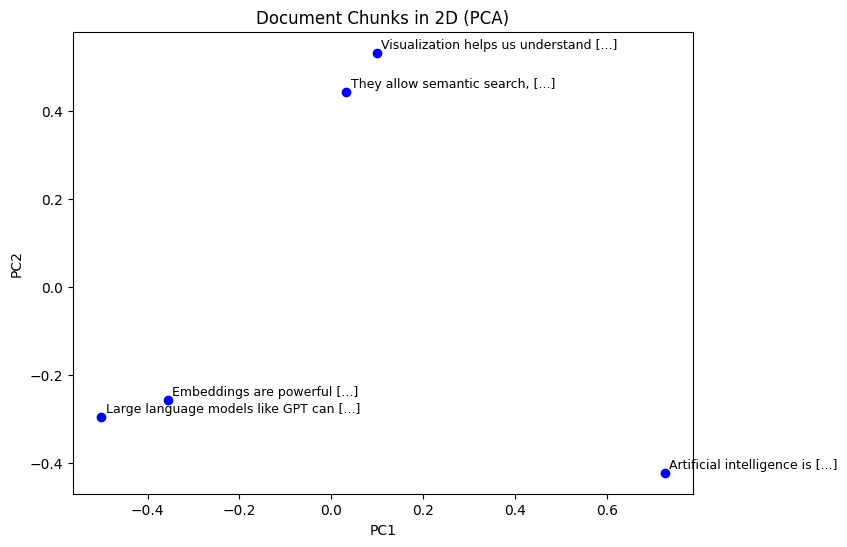

In [30]:
# Install dependencies if not already installed:
# pip install sentence-transformers scikit-learn matplotlib

from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import textwrap

# 1. Example document (could be from PDF or file)
document = """
Artificial intelligence is transforming industries. 
Large language models like GPT can understand and generate text. 
Embeddings are powerful representations of text. 
They allow semantic search, clustering, and classification. 
Visualization helps us understand high-dimensional data.
"""

# 2. Split document into chunks (here, by sentences for simplicity)
chunks = [chunk.strip() for chunk in document.split("\n") if chunk.strip()]

# 3. Get embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")  # lightweight model
embeddings = model.encode(chunks)

# 4. Reduce embeddings to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# 5. Plot with matplotlib
plt.figure(figsize=(8,6))
for i, text in enumerate(chunks):
    x, y = reduced[i]
    plt.scatter(x, y, color="blue")
    plt.text(x+0.01, y+0.01, textwrap.shorten(text, width=40), fontsize=9)

plt.title("Document Chunks in 2D (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


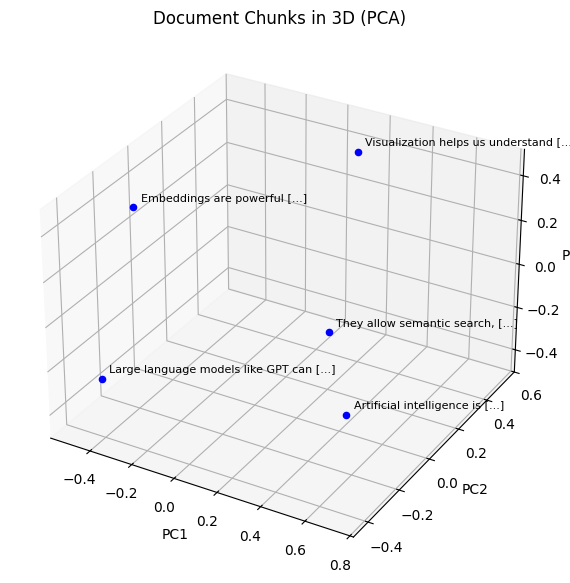

In [31]:
# pip install sentence-transformers scikit-learn matplotlib

from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting
import textwrap

# 1. Example document
document = """
Artificial intelligence is transforming industries. 
Large language models like GPT can understand and generate text. 
Embeddings are powerful representations of text. 
They allow semantic search, clustering, and classification. 
Visualization helps us understand high-dimensional data.
"""

# 2. Split into chunks
chunks = [chunk.strip() for chunk in document.split("\n") if chunk.strip()]

# 3. Get embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(chunks)

# 4. Reduce to 3D
pca = PCA(n_components=3)
reduced = pca.fit_transform(embeddings)

# 5. 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

for i, text in enumerate(chunks):
    x, y, z = reduced[i]
    ax.scatter(x, y, z, color="blue")
    ax.text(x+0.02, y+0.02, z+0.02, textwrap.shorten(text, width=40), fontsize=8)

ax.set_title("Document Chunks in 3D (PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


In [ ]:
This breakthrough was made possible thanks to
Graph
Graphi
Graphical
cal Pro
Process
Process
cessing
ing Units
Units (GPUs
GPUs
GPUs),
GPUs highly par-
allel consumer-grade computing devices devel-
oped for real-time image synthesis and repur-
posed for artificial neural networks.           